<a href="https://colab.research.google.com/github/KimJunGu9/2.algorithm/blob/main/7_%ED%95%B4%EC%89%AC%ED%85%8C%EC%9D%B4%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.해쉬테이블(Hash Table)

* 키(key)에 데이터(value)를 저장하는 데이터 구조
* 파이썬에서는 해쉬를 별도 구현할 필요가 없음
* 파이선 딕셔너리(Dictionary)타입이 해쉬 테이블의 예
* key 를 통해 데이터를 바로 찾을 수 있으므로 검색 속도가 빨라짐
* 보통 배열로 미리 Hash Table 사이즈만큼 생성 후에 사용

# 2.알아둘 용어

* 해쉬(Hash) : 임의 값을 고정 길이로 변환하는 것
* 해쉬 테이블(Hash Table) : 키 값의 연산에 의해 직접 접근이 가능한 데이터 구조
* 해쉬 함수(Hashing Function) : key에 대해 산술 연산을 이용해 데이터 위치를 찾을 수 있는 함수
* 해쉬 값(Hash value) 또는 해쉬 주소(Hash Address) : key를 해싱 함수로 연산해서 해쉬 값을 알아내고 이를 기반으로 해쉬 테이블에 해당 key에 대한 데이터위치를 일관성 있게 찾을 수 있음
* 슬롯(Slot) : 한 개의 데이터를 저장할 수 있는 공간

# 3.간단한 해쉬

### 3-1. 해쉬테이블

In [3]:
hash_table = list([i for i in range(10)])   # range(0이상 10미만)이 두번째 i로 들어가고 , 두번째 i에 들어간 것을 첫번째 i에 저장
print(hash_table)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 3-2. 해쉬 함수 만들기
* 해쉬 함수는 다양한 고안 기법이 있으며, 가장 간단한 방법인 Division법(나누기를 통한 나머지 값을 사용하는 기법)을 사용해보자


In [6]:
def hash_func(key):
  return key % 5

### 3-3. 해쉬 테이블에 저장하기
* 데이터에 따라 필요시 key생성 방법 정의가 필요함

In [7]:
data1 = 'apple'
data2 = 'banana'
data3 = 'orange'
data4 = 'melon'


# ord() : 문자의 아스키코드를 리턴
print(ord(data1[0]), ord(data2[0]), ord(data3[0]))
print(ord(data1[0]), hash_func(ord(data1[0])))  # 97을 hash_func함수에 넣으면 5로 나눈 나머지값이 2
print(ord(data3[0]), hash_func(ord(data3[0])))

97 98 111
97 2
111 1


In [ ]:
# 해쉬 테이블에 값을 저장하는 방법
# data : value 와 같이 data와 value를 넣으면 해당 data에 대한 key를 찾아서 key에 대응하는 해쉬주소에 value를 저장하는 방법

def storage_data(data, value): # 키와 밸류를 받겠다
  key = ord(data[0])     # data중에 첫 글자를 뽑아서 그것을 ord를해서 key에다가 저장을 한다.     key값은 97
  hash_address = hash_func(key)   # hash_address 는 2
  hash_table[hash_address] = value

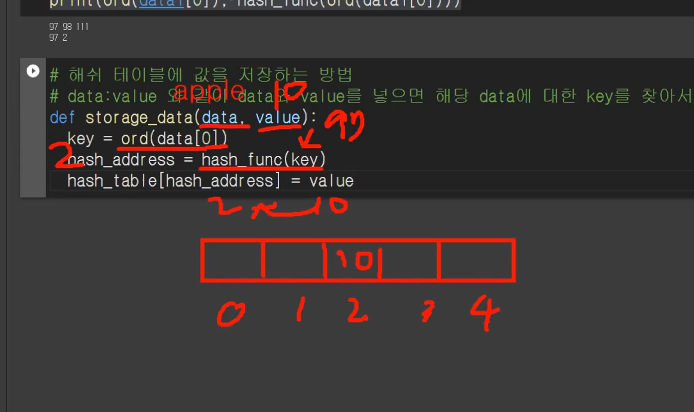

In [ ]:
storage_data('apple', '010-1111-1111')
storage_data('banana', '010-2222-2222')
storage_data('orange', '010-3333-3333')

In [ ]:
hash_table

[0, '010-3333-3333', '010-1111-1111', '010-2222-2222', 4, 5, 6, 7, 8, 9]

### 문제.
실제 키를 전달받아 저장된 값을 읽어오는 함수를 작성해보자


In [ ]:
def get_data(data):
  key = ord(data[0])
  hash_address = hash_func(key)
  return hash_table[hash_address]

In [ ]:
get_data('banana')

'010-2222-2222'

In [15]:
# 리스트 변수를 활용해서 해쉬 테이블 구현하기
# 해쉬 함수  : key % 8
# 해쉬 키 생성 : hash(data)


# 슬롯 만들기
hash_table = list([0 for i in range(8)]) # 0으로 다 채우기
print(hash_table)

[0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
def get_key(data):
  return hash(data)

def hash_function(key):
  return key % 8

def save_data(data, value):     # data에 key 값을 넣고, value에 value를 넣는다.
  hash_address = hash_function(get_key(data))
  hash_table[hash_address] = value

def read_data(data):
  hash_address = hash_function(get_key(data))
  return hash_table[hash_address]

In [13]:
save_data('melon', '010-9999-9999')

In [14]:
print(read_data('melon'))

010-9999-9999


# 4.자료구조 해쉬 테이블의 장단점

* 장점
  * 데이터 저장 및 읽기 속도가 빠름(검색 속도가 빠름)
  * 해쉬는 키에 대한 데이터가 있는지(중복) 확인이 쉬움

* 단점
  * 일반적으로 저장공간이 많이 필요함
  * 여러 키에 해당하는 주소가 동일할 경우 충돌을 해결하기 위한 별도의 자료구조가 필요함

# 5.충돌(Collision)해결 알고리즘
* 해쉬 테이블의 가장 큰 문제는 충돌

### 5-1.Linear Probling 기법
* 폐쇄 해싱 또는 Close Hashing 기법 중 하나
* 해쉬 테이블 저장공간 안에서 충돌 문제를 해결하는 기법
* 충돌이 일어나면 해당 hash address의 다음 address부터 맨 처음 나오는 빈 공간에 저장하는 기법
  * 저장공간 활용도를 높이기 위한 방법

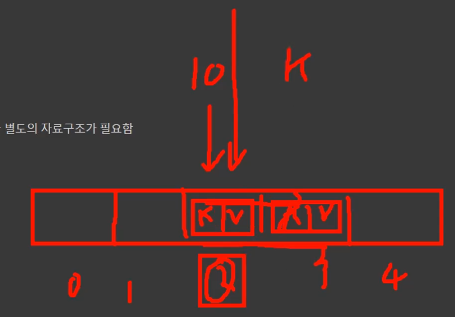

### 문제
1. 해쉬함수 : key % 8
2. 해쉬 키 생성 :  hash(data)

In [ ]:
hash_table = list([0 for i in range(8)])
print(hash_table)

[0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
def get_key(data):
  return hash(data)


def hash_function(key):
  return key % 8


def save_data(data, value):
  index_key = get_key(data) # 해쉬 값
  hash_address = hash_function(index_key) # 슬롯 값

  if hash_table[hash_address] != 0: # 이미 그 자리에 누군가가 있다면(0이 아니라면 = 충돌이 났다)
    for index in range(hash_address, len(hash_table)):
      if hash_table[index] == 0: # 빈 자리가 있으면
        hash_table[index] = [index_key, value] # 그 자리에 넣는다
        return
      elif hash_table[index][0] == index_key: # 그 자리에 해쉬값이 똑같은 애가 있으면(해쉬값은 리스트에서 앞자리에 있는 놈이 해쉬값이다(hash가 0, value가 1))
        hash_table[index][1] == value
        return
  else: # 누군가가 없다면 해쉬값과 밸류값을 그냥 넣으면 된다
    hash_table[hash_address] = [index_key, value]



def read_data(data):
  index_key = get_key(data)
  hash_address = hash_function(index_key)

  if hash_table[hash_address] != 0:
    for index in range(hash_address, len(hash_table)):
      if hash_table[index] == 0:
        return None
      elif hash_table[index][0] == index_key:
        return hash_table[index][1]
  else:
    return None

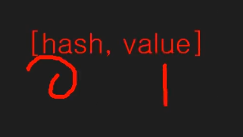

In [ ]:
save_data('apple', '010-1111-1111')
save_data('melon', '010-2222-2222')
save_data('banana', '010-3333-3333')

In [ ]:
print(hash('apple') % 8)
print(hash('avocado') % 8)
print(hash('cherry') % 8)
print(hash('banana') % 8)
print(hash('orange') % 8)
print(hash('melon') % 8)

1
2
5
6
6
7


In [ ]:
hash_table

[0,
 [-8983868781752568743, '010-1111-1111'],
 0,
 0,
 0,
 0,
 [-6620211060373545602, '010-3333-3333'],
 [-2260078450964044673, '010-2222-2222']]

In [ ]:
read_data('banana')

'010-3333-3333'

### 5-2.Chaining 기법
* 개방 해쉬 또는 open hashing 기법 중 하나
* 해쉬 테이블 저장공간 외의 공간을 활용하는 방법
* 충돌이 일어나면 링크드 리스트 자료구조를 사용해서 링크드 리스트로 데이터를 추가로 뒤로 연결시켜 저장하는 기법
* (다른 언어(자료구조)에서는 링크드 리스트를 사용하지만, 파이썬은 일반 리스트를 사용한다.)

In [1]:
hash_table = list([0 for i in range(8)])

In [2]:
def get_key(data):
  return hash(data)


def hash_function(key):
  return key % 8


def save_data(data, value):
  index_key = get_key(data)
  hash_address = hash_function(index_key)

  if hash_table[hash_address] != 0: # hashtable의 address가 0이 아니면(충돌이 났다면)
    for index in range(len(hash_table[hash_address])):
      if hash_table[hash_address][index][0] == index_key: # 해쉬키가 들어가는부분이 indexkey와 일치하니?
        hash_table[hash_address][index][1] = value
        return
    hash_table[hash_address].append([index_key, value])
  else: # 0이면 그냥 집어넣는다
    hash_table[hash_address] = [[index_key, value]]


def read_data(data):
  index_key = get_key(data)
  hash_address = hash_function(index_key)
  if hash_table[hash_address] != 0:
    for index in range(len(hash_table[hash_address])):
      if hash_table[hash_address][index][0] == index_key:
        return hash_table[hash_address][index][1]
  else:
    return None

In [3]:
print(hash('apple') % 8)
print(hash('avocado') % 8)
print(hash('cherry') % 8)
print(hash('banana') % 8)
print(hash('orange') % 8)
print(hash('melon') % 8)

4
6
1
4
7
7


In [4]:
save_data('apple', '010-1111-1111')
save_data('avocado', '010-2222-2222')
save_data('cherry', '010-3333-3333')
save_data('banana', '010-4444-4444')
save_data('orange', '010-5555-5555')
save_data('melon', '010-6666-6666')

In [5]:
hash_table

[0,
 [[7820043253883138697, '010-3333-3333']],
 0,
 0,
 [[-814339502501943948, '010-1111-1111'],
  [-1327550213267712876, '010-4444-4444']],
 0,
 [[-2528343050007055138, '010-2222-2222']],
 [[4138863293725165551, '010-5555-5555'],
  [-1405166550467735233, '010-6666-6666']]]

In [6]:
read_data('melon')

'010-6666-6666'

# 6.해쉬함수와 키 생성 함수
* 파이썬의 hash() 함수는 실행할 때마다 값이 달라질 수 있음
* SHA(Secure Hash Alogorithm, 안전한 해쉬 알고리즘)와 같은 유명한 해쉬 알고리즘이 있음
* 어떤 데이터도 유일한 고정된 크기의 고정값을 리턴해주므로 해쉬 함수로 유용하게 활용 가능

### 6-1.SHA-1

In [ ]:
import hashlib

data = 'test'.encode()
print(data)

hash_object = hashlib.sha1()
print(hash_object)

hash_object.update(data)
hex_dig = hash_object.hexdigest()
print(hex_dig) # 16진수로 고정된 해쉬 값 (20바이트)
print(int(hex_dig, 16)) # 10진수로 고정된 해쉬 값

b'test'
<sha1 HASH object @ 0x7fddd5769a20>
a94a8fe5ccb19ba61c4c0873d391e987982fbbd3
966482230667555116936258103322711973649032657875


### 컴퓨터의 용량 단위
* 1bit : 0 또는 1
* 8bit : 1byte
* 1024byte = 1KB
* 1024KB = 1MB
* 1024MB = 1GB
* 1024GB = 1TB
* 1024TB = 1PB

### 6-2.SHA-256
* SHA 알고리즘의 한 종류로 256비트로 구성되어 64자리 문자열을 반환
* SHA-2 계열 중 하나이며 블록체인에서 가장 많이 채택하여 사용

In [ ]:
import hashlib

data = 'test'.encode()
print(data)
hash_object = hashlib.sha256()
print(hash_object)
hash_object.update(data)
hex_dig = hash_object.hexdigest()
print(hex_dig) # 16진수로 고정된 해쉬 값
print(int(hex_dig, 16)) # 10진수로 고정된 해쉬 값

b'test'
<sha256 HASH object @ 0x7fddd568cbd0>
9f86d081884c7d659a2feaa0c55ad015a3bf4f1b2b0b822cd15d6c15b0f00a08
72155939486846849509759369733266486982821795810448245423168957390607644363272


### 문제

Chaining 기법을 적용한 해쉬 테이블 코드에 키 생성 함수 sha256 해쉬 알고리즘을 사용하도록 변경해보자.

1. 해쉬 함수 : key % 8
2. 해쉬 키 생성 : sha256(data)

In [ ]:
import hashlib

hash_table = list([0 for i in range(8)])

def get_key(data):
  hash_object = hashlib.sha256()
  hash_object.update(data.encode())
  hex_dig = hash_object.hexdigest()
  return int(hex_dig, 16)


def hash_function(key):
  return key % 8

def save_data(data, value):
  index_key = get_key(data)
  hash_address = hash_function(index_key)
  if hash_table[hash_address] != 0:
    for index in range(len(hash_table[hash_address])):
      if hash_table[hash_address][index][0] == index_key:
        hash_table[hash_address][index][1] = value
        return
    hash_table[hash_address].append([index_key, value])
  else:
    hash_table[hash_address] = [[index_key, value]]

def read_data(data):
  index_key = get_key(data)
  hash_address = hash_function(index_key)
  if hash_table[hash_address] != 0:
    for index in range(len(hash_table[hash_address])):
      if hash_table[hash_address][index][0] == index_key:
        return hash_table[hash_address][index][1]
  else:
    return None

In [ ]:
save_data('apple', '010-1111-1111')
save_data('avocado', '010-2222-2222')
save_data('cherry', '010-3333-3333')
save_data('banana', '010-4444-4444')
save_data('orange', '010-5555-5555')
save_data('melon', '010-6666-6666')

In [ ]:
hash_table

[[[112982323934352589425180049383729697652692462823327605015335539780563025432096,
   '010-2222-2222']],
 0,
 0,
 [[26452929773915387181124022930352263286101059613432915788569047929437325971227,
   '010-1111-1111']],
 [[12347729439854570657921908745856170563904168537595263672036856469419797331348,
   '010-5555-5555']],
 0,
 [[20663375971449343567437890939728808532354865817022289781333181590448322644526,
   '010-3333-3333'],
  [81677505976092492256788526045794788656350341275302681754807117191827310239310,
   '010-4444-4444']],
 [[75635856040252375081268883667212387409410230564410600651936135151777611054631,
   '010-6666-6666']]]

In [ ]:
read_data('cherry')

'010-3333-3333'